In [91]:
from qiskit import *
import numpy as np
from functools import partial
from qiskit.aqua.components.optimizers import COBYLA
from scipy.optimize import minimize, fmin_slsqp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
theta = np.array([0.5, np.pi*2, 1.4, 1/3, np.pi/2, 1.3, 1.4, 0.22, 1.2, 0.99, 1.0, 0.23, 0.14, 0.90, np.pi])

def run_quantum_circ(n, theta):
    '''
    This creates a quantum circuit with n qubits. 
    '''
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    circuit = QuantumCircuit(qr, cr)
    
    #Applies Hadamard Gate to first 
    circuit.h(0)
    
    #Entangles the qubits
    for i in range(n-1):
        circuit.cx(i, i+1)
        
    # For ease of understanding 
    circuit.barrier()
    
    # Applying U3 gates -- later
    i = 0
    for i in range(n):
        circuit.u3(theta[3*i], theta[(3*i)+1], theta[(3*i)+2], i)
    
    circuit.barrier()
    
    # Unentangling qubits 
    for i in reversed(range(n)):
        if i-1==-1:
            break
        else:
            circuit.cx(i-1, i)
            
    circuit.h(0)   
    circuit.barrier()
            
    # Measuring the values 
    for i in range(n-1):
        circuit.measure(i, i)
    
    backend = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend=backend, shots=10000).result()
    return result.get_counts()

In [36]:
theta_c = np.array([np.pi*2, np.pi/2, 0.22, 1.0, 0.90])

def run_classical_circ(n, theta):
    '''
    This creates a quantum circuit with n qubits. 
    '''
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    circuit = QuantumCircuit(qr, cr)
    
        
    # For ease of understanding 
    circuit.barrier()
    
    # Applying U3 gates -- later
    i = 0
    for i in range(n):
        circuit.u2(theta[i], 0, i)
      
    circuit.barrier()
            
    # Measuring the values 
    for i in range(n-1):
        circuit.measure(i, i)
    
    backend = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend=backend, shots=10000).result()
    return result.get_counts()

In [37]:
# Translate from dictionary to sorted values. 
def dic_to_vec(dic):
    '''
    Converts to dictionary outputted by the quantum/classical circuit to a 2^n dimensional (dim = 32) vector. 
    '''
    scores = np.zeros(32)
    num_shots = 10000
    for key in dic.keys():
        i = int(key,2)
        scores[i] = dic[key]/num_shots
    return scores

In [38]:
# The Payoff matrix -- made it here at random
v1 = np.random.rand(5,1)*np.random.rand(1)
v2 = np.random.rand(1,32)
payoff_mat = np.matmul(v1,v2)

In [39]:
def payoff_finder(result, payoff):
    '''
    Input: results from quantum/classical calc (32x1), payoff matrix.  
    Output: payoff matrix for that particular 
    '''
    return np.matmul(payoff, result)

In [40]:
def quantum_cost_function(n, rand_payoff_mat, theta):
    '''
    Input: number of qubits, initial values of theta, the payoff matrix you've generated
    Output: a singular number that represents how large the difference between the standard deviation
            and L1 norm. 
    '''
    
    # Runs the quantum circuit and returns a dictionary of values. 
    dic = run_quantum_circ(n, theta)
    vec = dic_to_vec(dic)
    payoff_vec = payoff_finder(vec, rand_payoff_mat)
    val = np.linalg.norm(payoff_vec, ord = 1) - np.std(payoff_vec)
    return -val

#quantum_cost_function(5,theta,payoff_mat)

In [41]:
def classical_cost_function(n, rand_payoff_mat, theta):
    '''
    Input: number of qubits, initial values of theta, the payoff matrix you've generated
    Output: a singular number that represents how large the difference between the standard deviation
            and L1 norm. 
    '''
    dic = run_classical_circ(n, theta)
    vec = dic_to_vec(dic)
    payoff_vec = payoff_finder(vec, rand_payoff_mat)
    val = np.linalg.norm(payoff_vec, ord = 1) - np.std(payoff_vec)
    return -val

In [44]:
vals = []
def callback(res):
    params.append(res)

def callback_classic(res):
    params_c.append(res)

In [69]:
#backup_params = params

In [106]:
params = []
qcost = partial(quantum_cost_function, 5, payoff_mat)
results = minimize(qcost, theta, method='Nelder-Mead', callback = callback)#, tol=1e-9)
results

 final_simplex: (array([[0.40684597, 4.56960584, 1.4152666 , 0.30509104, 1.91866002,
        1.34651168, 3.22887869, 0.22074326, 1.30420734, 0.06131109,
        0.96735608, 0.23031093, 0.10713509, 1.04852028, 3.1527454 ],
       [0.40684597, 4.56960584, 1.4152666 , 0.30509104, 1.91866002,
        1.34651168, 3.22887869, 0.22074326, 1.30420734, 0.06131109,
        0.96735608, 0.23031093, 0.10713509, 1.04852028, 3.1527454 ],
       [0.40684597, 4.56960584, 1.4152666 , 0.30509104, 1.91866002,
        1.34651168, 3.22887869, 0.22074326, 1.30420734, 0.06131109,
        0.96735608, 0.23031093, 0.10713509, 1.04852028, 3.1527454 ],
       [0.40684597, 4.56960584, 1.4152666 , 0.30509104, 1.91866002,
        1.34651168, 3.22887869, 0.22074326, 1.30420734, 0.06131109,
        0.96735608, 0.23031093, 0.10713509, 1.04852028, 3.1527454 ],
       [0.40684597, 4.56960584, 1.4152666 , 0.30509104, 1.91866002,
        1.34651168, 3.22887869, 0.22074326, 1.30420734, 0.06131109,
        0.96735608, 0.23031

In [105]:
params_c = []
ccost = partial(classical_cost_function, 5, payoff_mat)
results_c = minimize(ccost, theta_c, method='Nelder-Mead', callback = callback_classic)
results_c

 final_simplex: (array([[6.00778833, 1.60203316, 0.22423482, 0.9844972 , 0.93505427],
       [6.00778833, 1.60203316, 0.22423482, 0.9844972 , 0.93505427],
       [6.00778833, 1.60203316, 0.22423482, 0.9844972 , 0.93505427],
       [6.00778833, 1.60203316, 0.22423482, 0.9844972 , 0.93505427],
       [6.00778833, 1.60203316, 0.22423482, 0.9844972 , 0.93505427],
       [6.00778833, 1.60203316, 0.22423482, 0.9844972 , 0.93505427]]), array([-1.16576055, -1.16134992, -1.1603673 , -1.15739279, -1.15534722,
       -1.15413337]))
           fun: -1.1657605455243454
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 1000
           nit: 370
        status: 1
       success: False
             x: array([6.00778833, 1.60203316, 0.22423482, 0.9844972 , 0.93505427])

In [108]:
vals = []
for param in params:
    vals.append(0-quantum_cost_function(5, payoff_mat, param))
vals_c = []
for param in params_c:
    vals_c.append(0-classical_cost_function(5, payoff_mat, param))


In [120]:
max_c = np.asarray(vals_c).max()
max_q = np.asarray(vals).max()

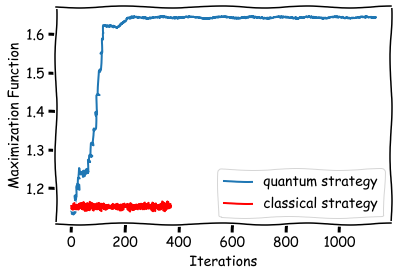

In [132]:
with plt.xkcd():
    plt.plot(list(range(len(vals))), vals, label="quantum strategy")
    plt.plot(list(range(len(vals_c))), vals_c, color='r', label = "classical strategy")
    #plt.axhline(max_c, color='r', ls='--', label = 'Maximum quantum value reached')
    #plt.axhline(max_q, color='b', ls='--', label = 'Maximum classical value reached')
    plt.xlabel('Iterations')
    plt.ylabel('Maximization Function')
    plt.legend()